# Method-1: Naive Loop-Based Implementation:
Code for finding a specific matrix of 3x3 dimension

In [1]:
import numpy as np
import time

def diagonal_elements(matrix):
    n = len(matrix)
    diagonal = []

    # Start measuring time for the loop
    start_time = time.time()

    for i in range(n):
        diagonal.append(matrix[i][i])

    # End measuring time for the loop
    end_time = time.time()
    loop_execution_time = end_time - start_time   #This calculates the total time for executing this loop

    return diagonal, loop_execution_time

# Example Unit Test:
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]                # Replace with your matrix
diagonal, loop_time = diagonal_elements(matrix)
m1=loop_time
print("Diagonal elements:", diagonal)
print("Loop execution time:", m1)

Diagonal elements: [1, 5, 9]
Loop execution time: 2.1457672119140625e-06


## Method-2: NumPy Implementation:

In [2]:
import numpy as np
import time

def diagonal_elements(matrix):
    # Start measuring time for the NumPy operation
    start_time = time.time()

    diagonal = np.diag(matrix)

    # End measuring time for the NumPy operation
    end_time = time.time()
    numpy_execution_time = end_time - start_time    #This calculates the total time for executing this loop

    return diagonal, numpy_execution_time

# Example Unit Test:
#matrix = np.random.rand(3,3)  # Replace with your matrix
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]

diagonal, numpy_time = diagonal_elements(matrix)
m2=numpy_time
print("Diagonal elements:", diagonal)
print("NumPy execution time:", m2)


Diagonal elements: [1 5 9]
NumPy execution time: 6.604194641113281e-05


# Method-3: TensorFlow Implementation (with GPU):

In [3]:
import tensorflow as tf
import time

def diagonal_elements(matrix):
    # Start measuring time for the TensorFlow operation
    start_time = time.time()

    with tf.device('/GPU:0'):
        diagonal = tf.linalg.diag_part(matrix)

    # End measuring time for the TensorFlow operation
    end_time = time.time()
    tensorflow_execution_time = end_time - start_time   #This calculates the total time for executing this loop

    return diagonal.numpy(), tensorflow_execution_time

# Example Unit Test:
#matrix = tf.constant(np.random.rand(3, 3), dtype=tf.float32)  # Replace with your matrix
matrix = [[1,2,3],
          [4,5,6],
          [7,8,9]]

diagonal, tensorflow_time = diagonal_elements(matrix)
m3=tensorflow_time
print("Diagonal elements:", diagonal)
print("TensorFlow execution time:", m3)


Diagonal elements: [1 5 9]
TensorFlow execution time: 0.0962362289428711


# Time consumption comparison of different implementations

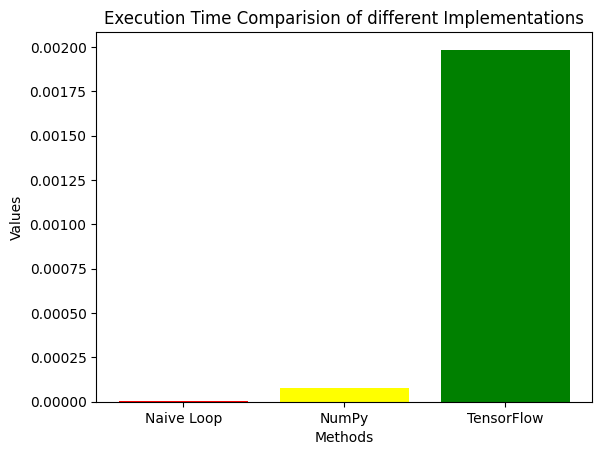

In [4]:
import matplotlib.pyplot as plt

# Create a list of element names and their values
elements = ["Naive Loop", "NumPy", "TensorFlow"]
values = [0.0000021457672119140625, 0.00007557868957519531, 0.0019850730895996094]

# Create a bar chart of the element values
plt.bar(elements, values)

plt.bar(elements, values, color=["red", "yellow", "green"])

# Set the title, x-axis label, and y-axis label
plt.title("Execution Time Comparision of different Implementations")
plt.xlabel("Methods")
plt.ylabel("Values")

# Show the bar chart
plt.show()
